In [1]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import clear_output

#For displaying animations inside a jupyter notebook
%matplotlib notebook 

# N-Body Simulation

## System Class

In [2]:
AU = 1.49e11 #Astronomical units
G=6.67e-11 #Gravitational constant

class System:
    
    def __init__(self, bodies, time_step):
        # Initialises with given quantities
        
        self.bodies = bodies
        self.time_step = time_step
        
    def update(self):
        velocities = []
        positions = []
        directions = []
        
        for i in range(len(self.bodies)):
            
            #List of every other body to consider
            temp_bodies = self.bodies.copy()
            temp_bodies.remove(self.bodies[i])
            
            #Calculate update
            velocity, position, direction = self.bodies[i].update(self.time_step, temp_bodies)
            
            
            velocities.append(velocity)
            positions.append(position)
            directions.append(direction)
            
        for i in range(len(self.bodies)):
            self.bodies[i].velocity = velocities[i]
            self.bodies[i].position = positions[i]
            self.bodies[i].vel_direction = directions[i]

## Body Class

In [3]:
class Body:
    
    def __init__(self, position, vel, vel_direction, mass=0, color="r", size=3):
        # Initialises with given quantities
        
        #Should be a tuple with x and y position
        self.position = position
        
        self.velocity = vel
        
        self.vel_direction = vel_direction
        
        self.mass = mass
        
        self.color = color
        
        self.size = size
    
    def force_by_body(self, body):
        # Returns the force acting on this body by another, given body
        # Returns as a tuple of force in the x and y direction
        
        #Define quantities from self and body
        m1, m2 = self.mass, body.mass
        x1, y1 = self.position[0], self.position[1]
        x2, y2 = body.position[0], body.position[1]
        
        #Find distance between the bodies
        r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        #If the radius is 0, the force is also 0
        if r == 0:
            return 0, 0
            
        #Calculate the force with the law of gravitation
        force = (m1*m2*G) / r**2
        
        #Find differences in distance
        dist_x = x2 - x1
        dist_y = y2 - y1
        
        #Determine direction (radians)
        direction = np.arctan2(dist_y, dist_x)
        
        #Find component forces
        force_x = force * np.cos(direction)
        force_y = force * np.sin(direction)
        
        return force_x, force_y
    
    def acceleration(self, bodies):
        
        total_force_x = 0
        total_force_y = 0
        
        for body in bodies:
            force = self.force_by_body(body)
            
            total_force_x += force[0]
            total_force_y += force[1]
        
        return (total_force_x / self.mass, total_force_y / self.mass)
    
    def update(self, time_step, bodies):        
        #Changes velocity into Cartesian coordinates
        # We don't like polar coordinates in this household unfortunately
        vel_x = self.velocity * np.cos(np.deg2rad(self.vel_direction))
        vel_y = self.velocity * np.sin(np.deg2rad(self.vel_direction))
        
        
        #Calculate current acceleration
        a = self.acceleration(bodies)
        
        new_vel_x = vel_x + a[0]*time_step
        new_vel_y = vel_y + a[1]*time_step
        
        new_vel = np.sqrt(new_vel_x**2 + new_vel_y**2)
        new_direction = np.rad2deg(np.arctan2(new_vel_y, new_vel_x))
        
        #Calculate new position
        new_pos_x = self.position[0] + vel_x*time_step + 0.5*a[0]*time_step*time_step
        new_pos_y = self.position[1] + vel_y*time_step + 0.5*a[1]*time_step*time_step
        
        new_pos = (new_pos_x, new_pos_y)
        
        #print(self.velocity, new_vel)
        #print(self.position, new_pos)
        #print(self.vel_direction, new_direction)
        
        return new_vel, new_pos, new_direction

## Test Cases and Animation

In [4]:
#Test case 1

scale = 3e9
G = 6.67e-11 
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size = 15)
b2 = Body(position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size = 15)

bodies = [b1, b2]

In [5]:
#Test case 2

scale = 1.79e9
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = 42.843398292913164

b1 = Body(position = pos, mass = m1, vel = v, vel_direction = v_d, color = 'r', size = 15)
b2 = Body(position = -pos, mass = m1, vel = v, vel_direction = v_d, color = 'g', size = 15)
b3 = Body(position = (0,0), mass = m1, vel = 2*v, vel_direction = v_d-180, color = 'b', size = 15)

bodies = [b1, b2, b3]

In [6]:
# Test case 3

scale = 1.49e11

Sun     = Body(position = (0,0), 
               vel = 0, 
               vel_direction = 0)

Earth   = Body(position = (-1*scale,0),
                vel = 29.783*1000,
                vel_direction = 90)

Venus   = Body(position = (0.723*scale, 0),
                vel = 35.02*1000,
                vel_direction = 270)

Mars    = Body(position = (-1.52*scale, 0),
                vel = 24*1000,
                vel_direction = 90)


Sun.mass    = 1.98892e30
Sun.color   = 'orange'
Sun.size    = 30
    
Earth.mass  = 5.9742 * 10 ** 24
Earth.color = 'b'
Earth.size  = 8
    
Venus.mass  = 4.8685 * 10 ** 24
Venus.color = 'y'
Venus.size  = 9
   
Mars.mass   = 6.39 * 10 ** 23
Mars.color  = 'r'
Mars.size   = 6


bodies = [Sun, Earth, Venus, Mars]

<IPython.core.display.Javascript object>


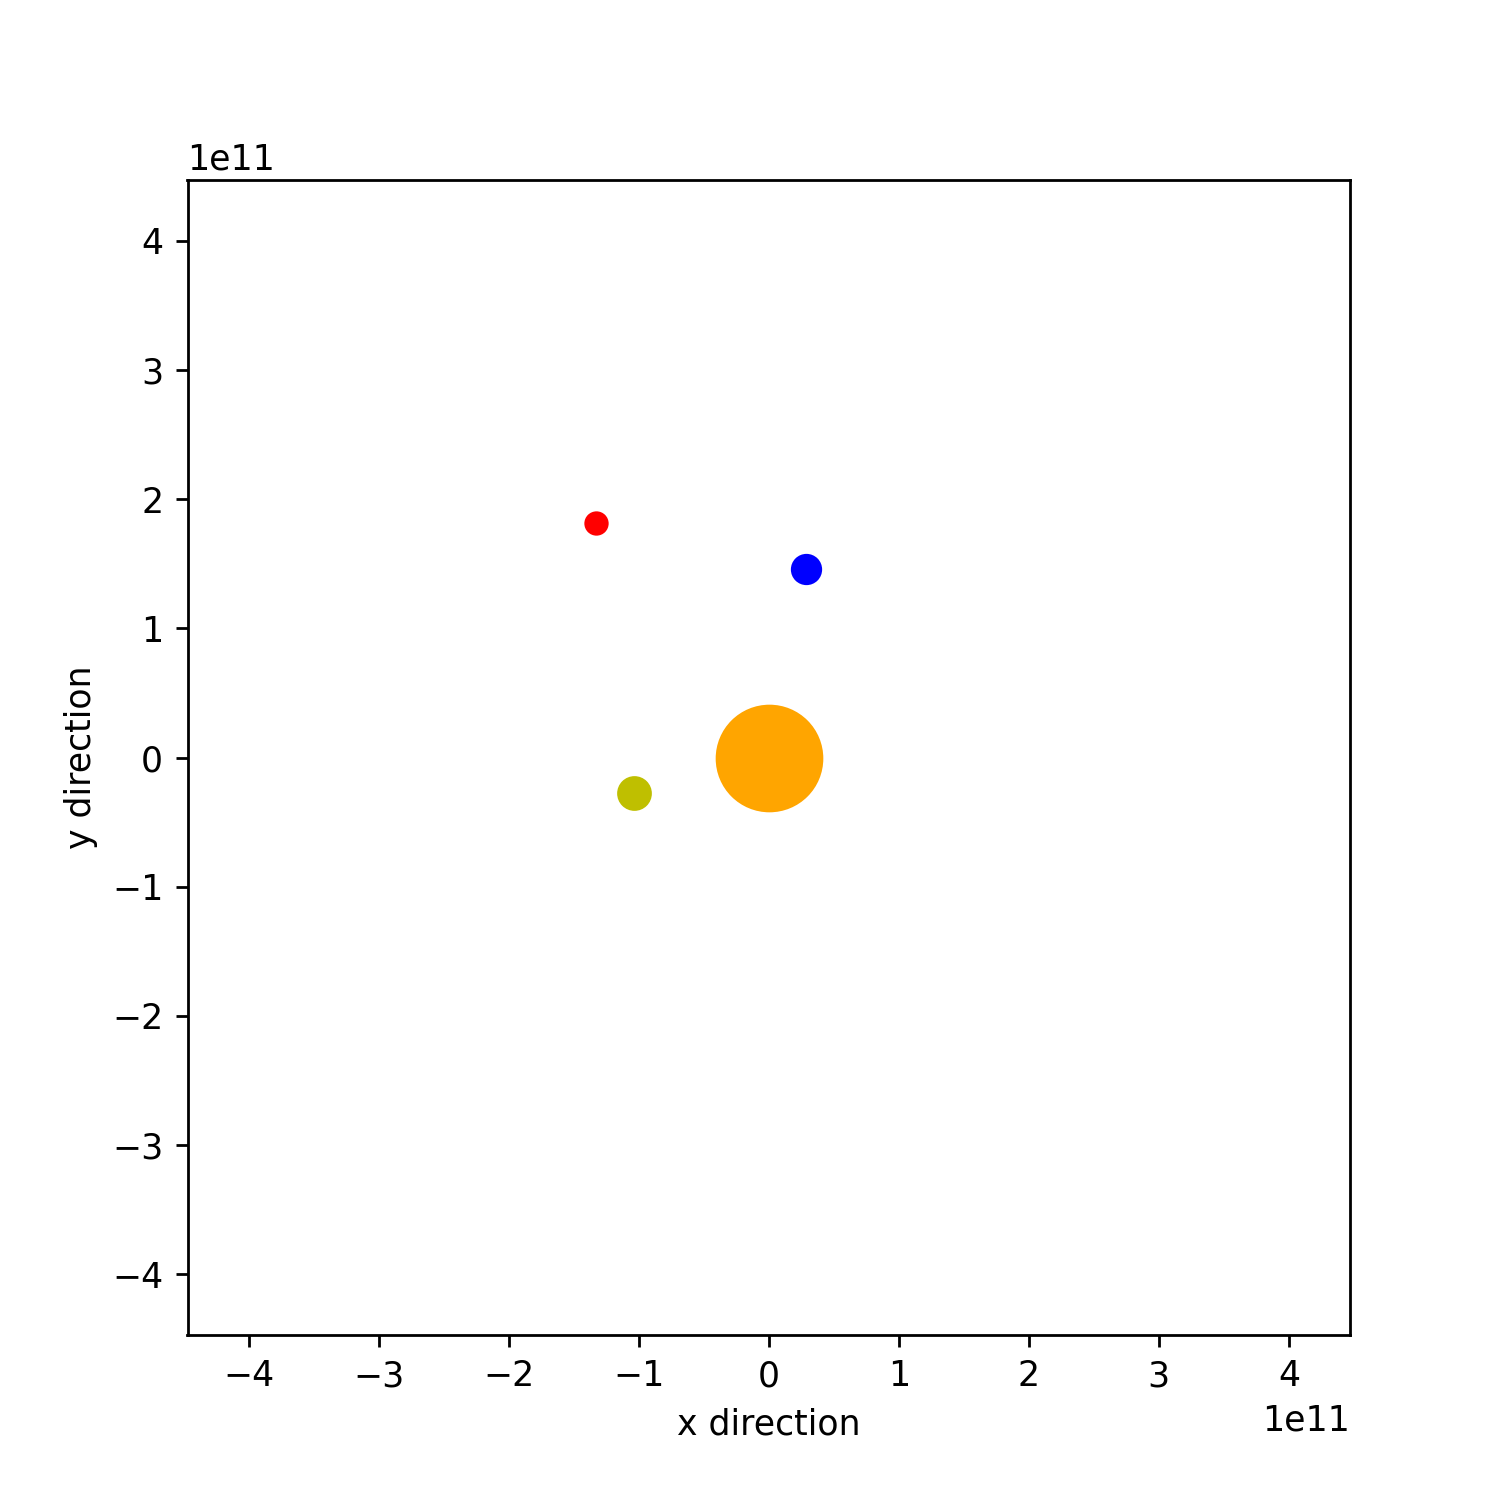

In [7]:
def animate(i, system, lines):
    #Run 200 update steps between each frame.
    #Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 1000/30, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
#print("Writing to file")
#ani.save("OrbitSimulation.gif")
#print("Done")

plt.show()